In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw/data.csv')

In [3]:
df.shape

(95662, 16)

In [4]:
cols = df.columns

print("columns:", cols)


columns: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
#convert TransactionStartTime to date
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"])

In [7]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [8]:
# fraudstatus count 0 and 1
fraud_counts = df['FraudResult'].value_counts()
print("FraudStatus counts:\n", fraud_counts)

FraudStatus counts:
 FraudResult
0    95469
1      193
Name: count, dtype: int64


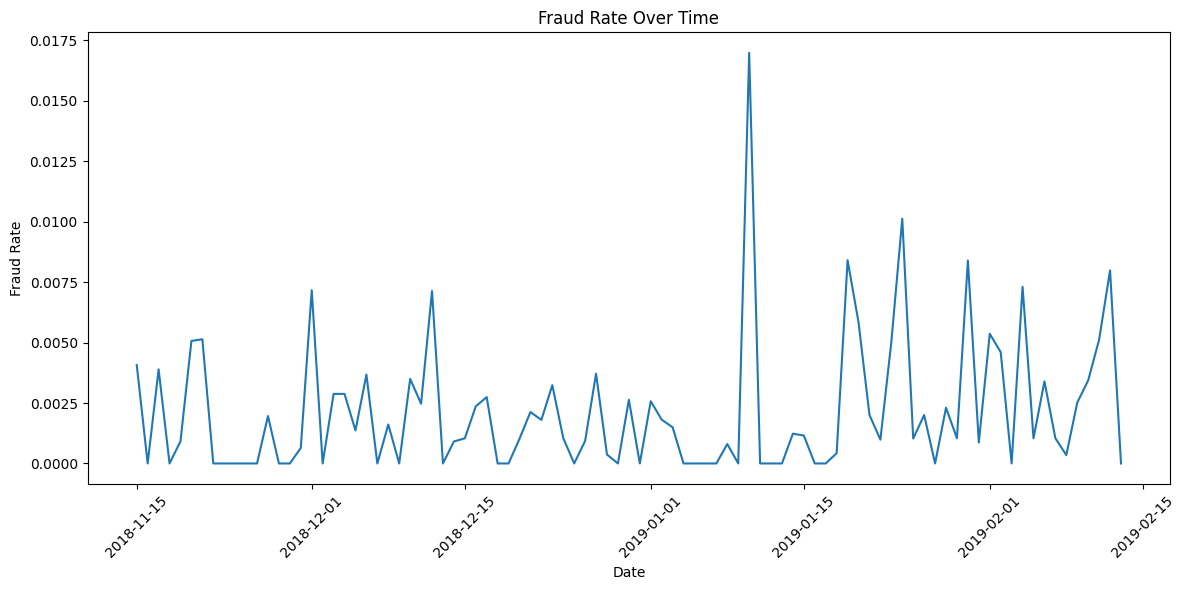

In [11]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Group by date and calculate fraud rate
fraud_over_time = df.groupby(df['TransactionStartTime'].dt.date)['FraudResult'].mean().reset_index()

# Plot fraud rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=fraud_over_time, x='TransactionStartTime', y='FraudResult')
plt.title('Fraud Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_5285/391035761.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='coolwarm')


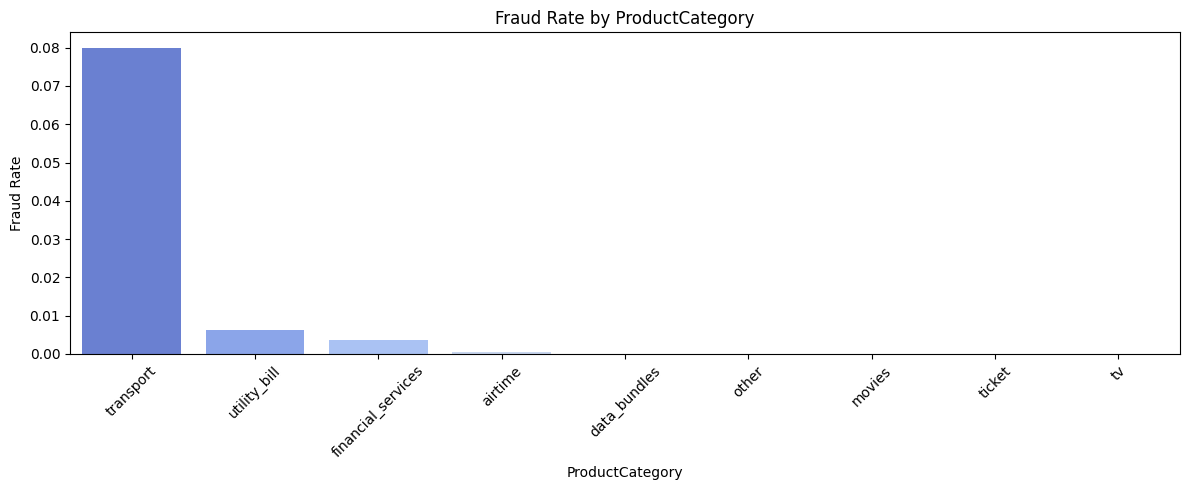

/tmp/ipykernel_5285/391035761.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='coolwarm')


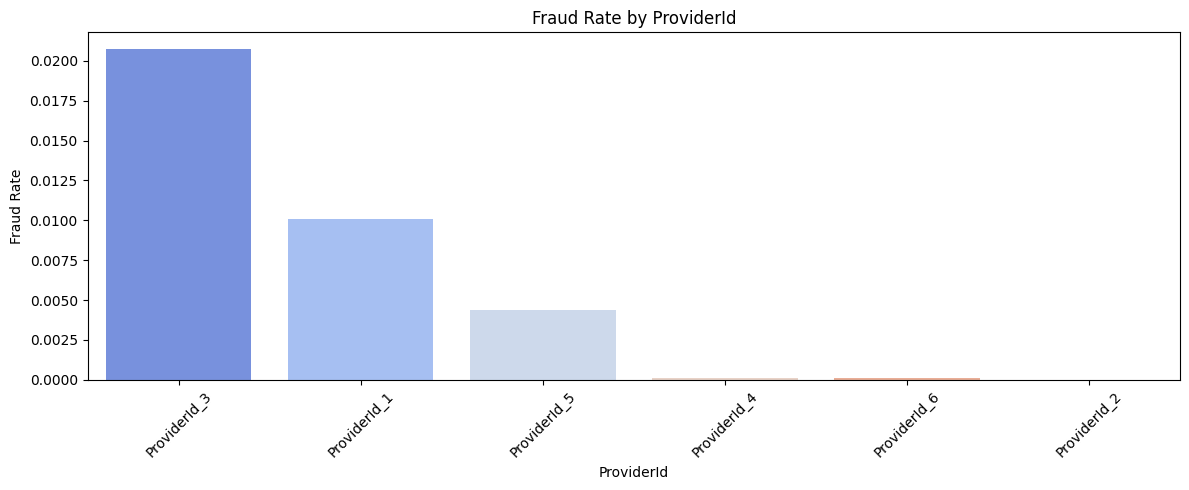

/tmp/ipykernel_5285/391035761.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='coolwarm')


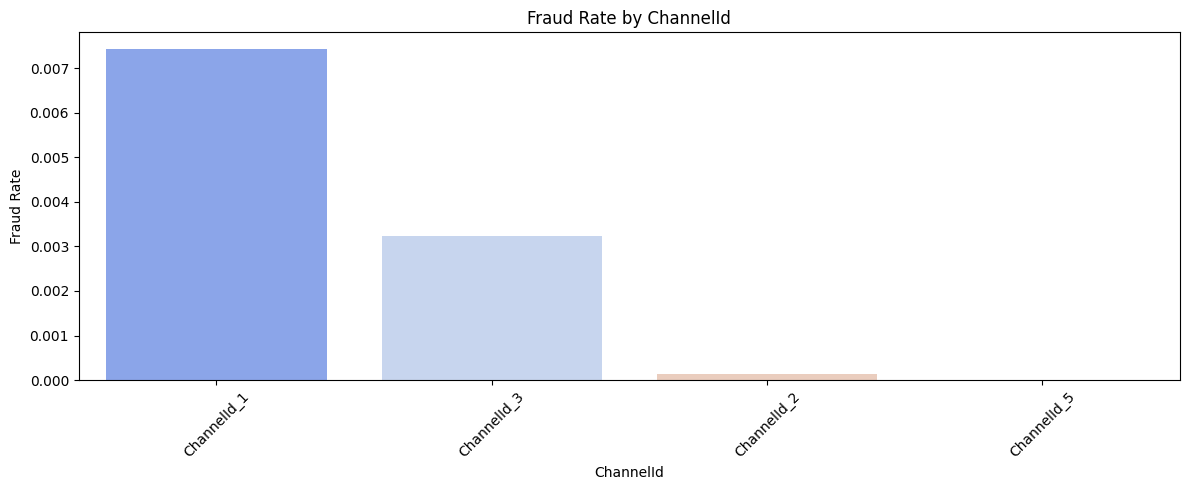

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['ProductCategory', 'ProviderId', 'ChannelId']

for col in cols:
    plt.figure(figsize=(12, 5))
    fraud_rate = df.groupby(col)['FraudResult'].mean().sort_values(ascending=False)
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='coolwarm')
    plt.title(f'Fraud Rate by {col}')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_5285/2983081343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FraudResult', y='Amount', data=df, palette='Set2')


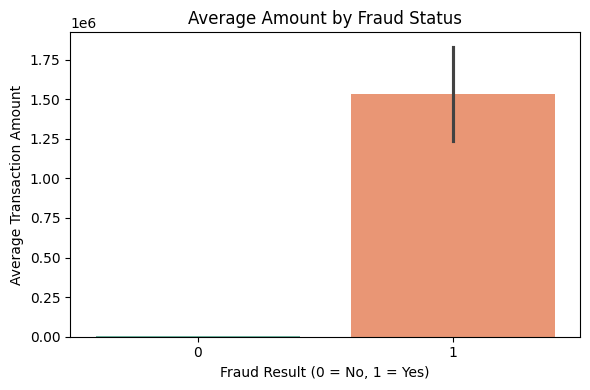

In [14]:
plt.figure(figsize=(6, 4))
sns.barplot(x='FraudResult', y='Amount', data=df, palette='Set2')
plt.title('Average Amount by Fraud Status')
plt.xlabel('Fraud Result (0 = No, 1 = Yes)')
plt.ylabel('Average Transaction Amount')
plt.tight_layout()
plt.show()


In [18]:
# print the AMOUNT WHERE  FraudResult is 1
fraud_transactions = df[df['FraudResult'] == 1]
print("Number of fraud transactions:", fraud_transactions["Amount"])

df["Amount"].mean()

Number of fraud transactions: 131       700000.0
146       725000.0
155       700000.0
2376      700000.0
2452      700000.0
           ...    
94805    2000000.0
95108     500000.0
95262     500000.0
95264     500000.0
95268     500000.0
Name: Amount, Length: 193, dtype: float64


np.float64(6717.846433275491)